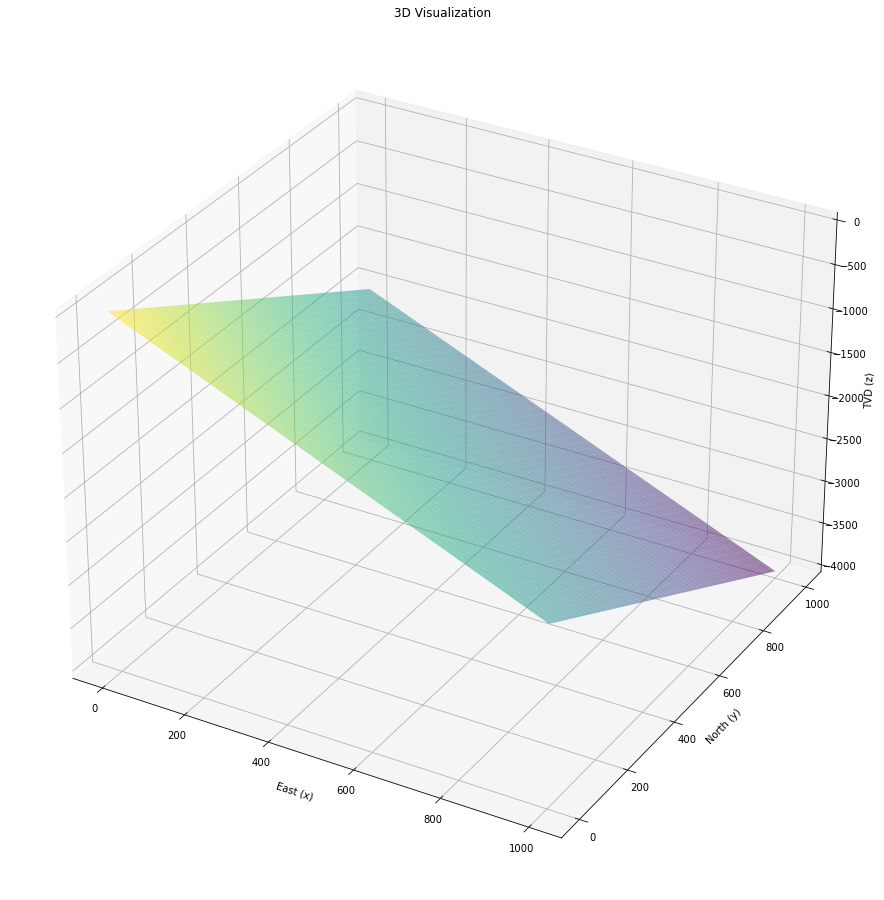

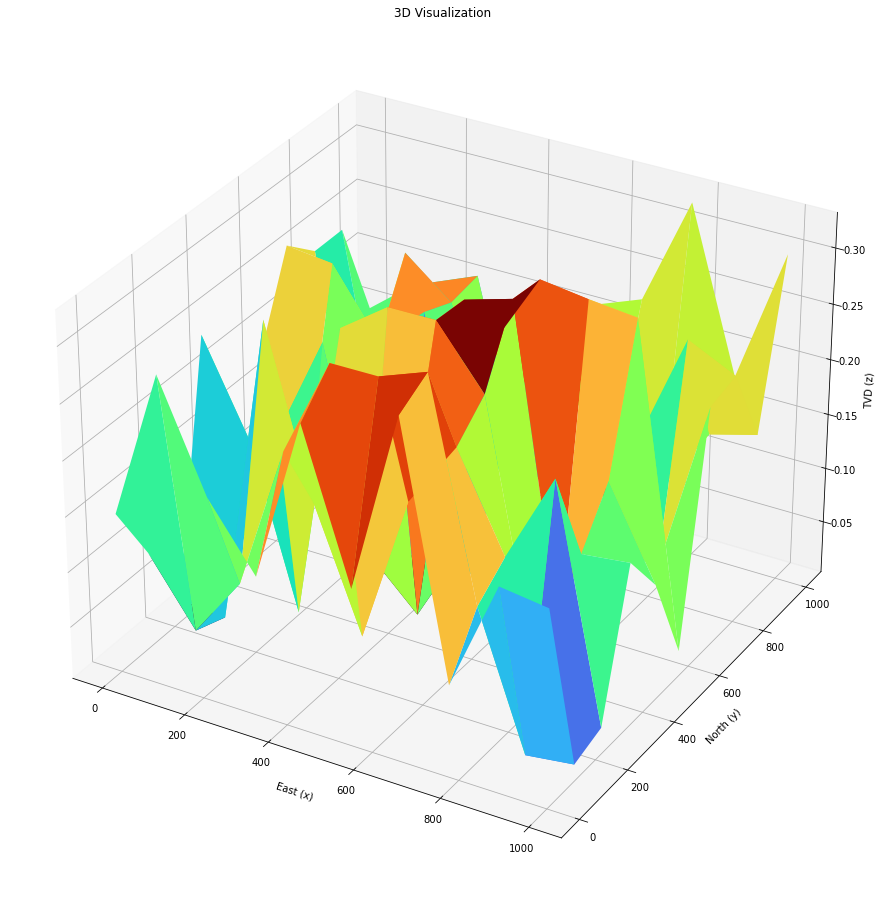

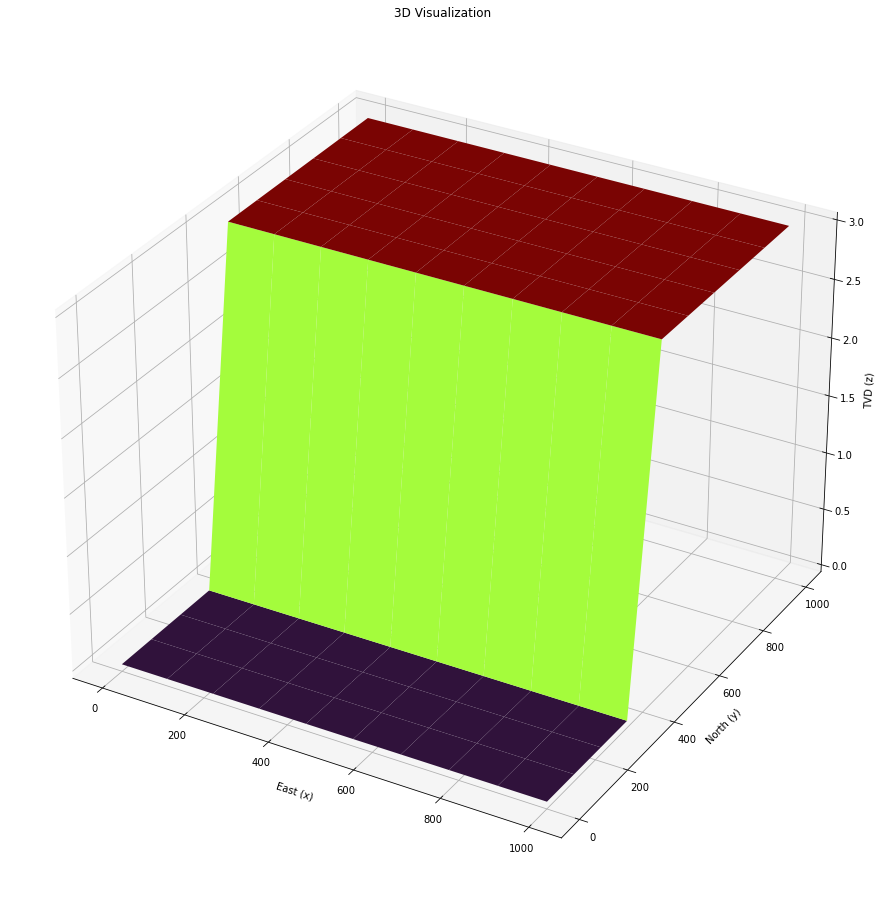

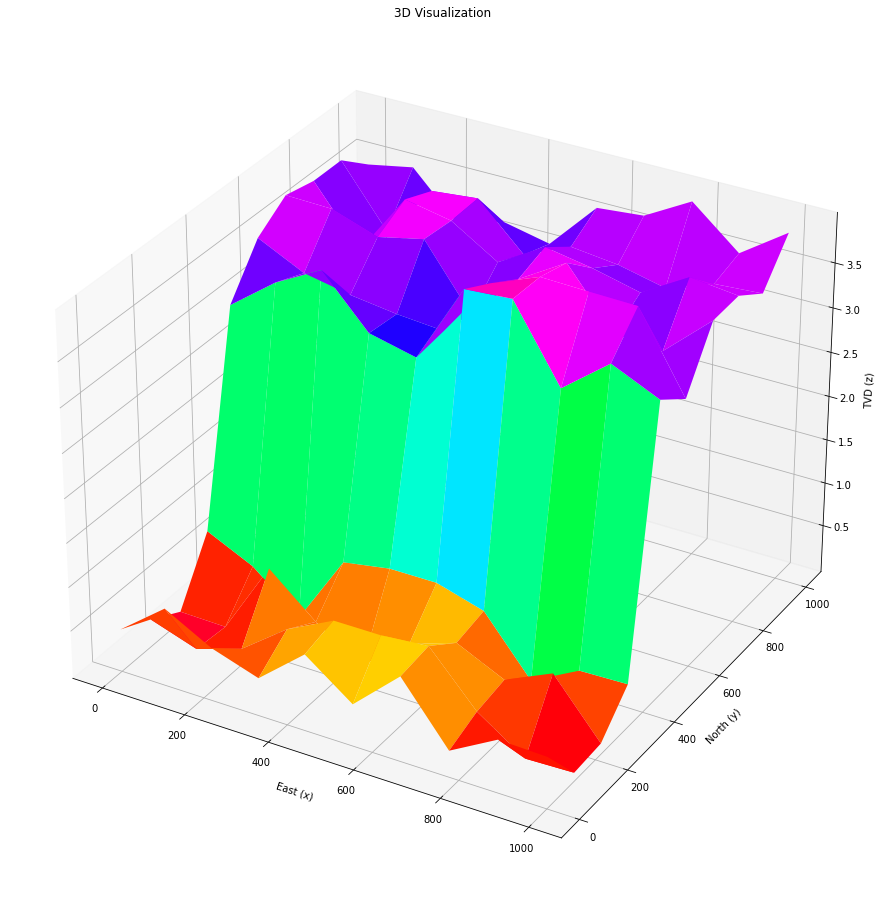

In [6]:
import numpy as np
from lib.Point3d import Point3d
from lib.Plane import Plane
from lib.Surface import Surface
from lib.SurfaceIO import SurfaceIO
from lib.Plotter3d import Plotter3d

def create_surface_with_random_values(minEast=0, minNorth=0, maxEast=1000, maxNorth=1000, numRows=10, numCols=10):
    surface = Surface(minEast, minNorth, maxEast, maxNorth, numRows, numCols)
    for row in range(surface.numRows):
        for col in range(surface.numCols):
            surface.set_value(row, col, np.random.rand()/3)
    return surface

# Create a plane
plane = Plane(A=1, B=1, C=0.5, D=0)

# Create a plotter
plotter1 = Plotter3d()

# Display the plane
plotter1.plot_plane(plane, minEast=0, maxEast=1000, minNorth=0, maxNorth=1000, cmap='viridis')
plotter1.show_plot()

# Create surfaces
surface1 = create_surface_with_random_values()
surface2 = SurfaceIO.load_from_file('data/surface_-90.json')

# Plot the surfaces
plotter12 = Plotter3d()
plotter12.plot_surface(surface1, cmap='turbo')
plotter12.show_plot()

plotter2 = Plotter3d()
plotter2.plot_surface(surface2, cmap='turbo')
plotter2.show_plot()

# Create a new surface by combining previous surfaces
surface3 = Surface(minEast=0, minNorth=0, maxEast=1000, maxNorth=1000, numRows=10, numCols=10)
for row in range(surface1.numRows):
    for col in range(surface1.numCols):
        value = surface1.get_value(row, col)*3 + surface2.get_value(row, col)
        surface3.set_value(row, col, value)

# Display the new surface
plotter3 = Plotter3d()
plotter3.plot_surface(surface3, cmap='gist_rainbow')

# Display all the plotted surfaces and planes
plotter3.show_plot()

# Demonstrate saving to and loading from a file
SurfaceIO.save_to_file(surface1, 'data/surface.json')
loaded_surface = SurfaceIO.load_from_file('data/surface.json')

# Ensure that the loaded surface is the same as the original
assert np.array_equal(surface1.get_data_2d(), loaded_surface.get_data_2d()), "Loaded surface data is not the same as the original"